**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The AI Resume Screening Dataset](https://www.kaggle.com/datasets/sonalshinde123/ai-driven-resume-screening-dataset/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.


# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

/kaggle/input/ai-driven-resume-screening-dataset/ai_resume_screening.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('/kaggle/input/ai-driven-resume-screening-dataset/ai_resume_screening.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,years_experience,skills_match_score,education_level,project_count,resume_length,github_activity,shortlisted
0,6,84.7,Bachelors,7,234,158,No
1,3,59.1,Masters,5,502,77,No
2,12,100.0,Masters,12,753,381,Yes
3,14,66.8,High School,8,529,407,Yes
4,10,99.6,Bachelors,10,754,331,Yes


## last Five row

In [4]:
df.tail()

,years_experience,skills_match_score,education_level,project_count,resume_length,github_activity,shortlisted
29995,9,77.4,Bachelors,13,691,434,Yes
29996,5,77.8,Bachelors,9,473,149,No
29997,1,64.6,Bachelors,7,247,82,No
29998,7,94.8,Bachelors,12,584,409,Yes
29999,14,77.3,Masters,25,694,790,Yes


## Shape of our dataset

In [5]:
df.shape

(30000, 7)

## List out all columns

In [6]:
df.columns

Index(['years_experience', 'skills_match_score', 'education_level',
       'project_count', 'resume_length', 'github_activity', 'shortlisted'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

years_experience        int64
skills_match_score    float64
education_level        object
project_count           int64
resume_length           int64
github_activity         int64
shortlisted            object
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   years_experience    30000 non-null  int64  
 1   skills_match_score  30000 non-null  float64
 2   education_level     30000 non-null  object 
 3   project_count       30000 non-null  int64  
 4   resume_length       30000 non-null  int64  
 5   github_activity     30000 non-null  int64  
 6   shortlisted         30000 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.6+ MB


## Check Null Value

In [9]:
df.isnull().sum()

years_experience      0
skills_match_score    0
education_level       0
project_count         0
resume_length         0
github_activity       0
shortlisted           0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,years_experience,skills_match_score,project_count,resume_length,github_activity
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,7.506567,73.682653,10.646267,572.584700,325.260667
std,4.624104,16.765909,4.634047,178.709918,159.951803
min,0.000000,0.500000,0.000000,150.000000,0.000000
25%,3.750000,62.100000,7.000000,441.000000,202.000000
50%,7.000000,74.300000,10.000000,574.000000,321.000000
75%,12.000000,86.500000,14.000000,709.000000,443.000000
max,15.000000,100.000000,25.000000,900.000000,842.000000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

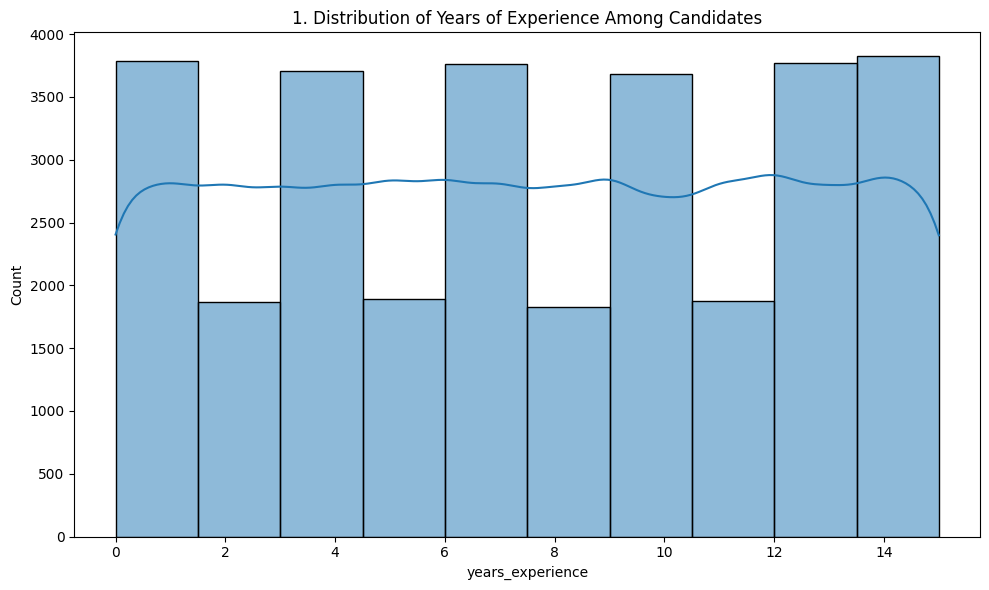

In [13]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['years_experience'], bins=10, kde=True)
plt.title(f'{plot_no}. Distribution of Years of Experience Among Candidates')
show_fig()
plot_no += 1


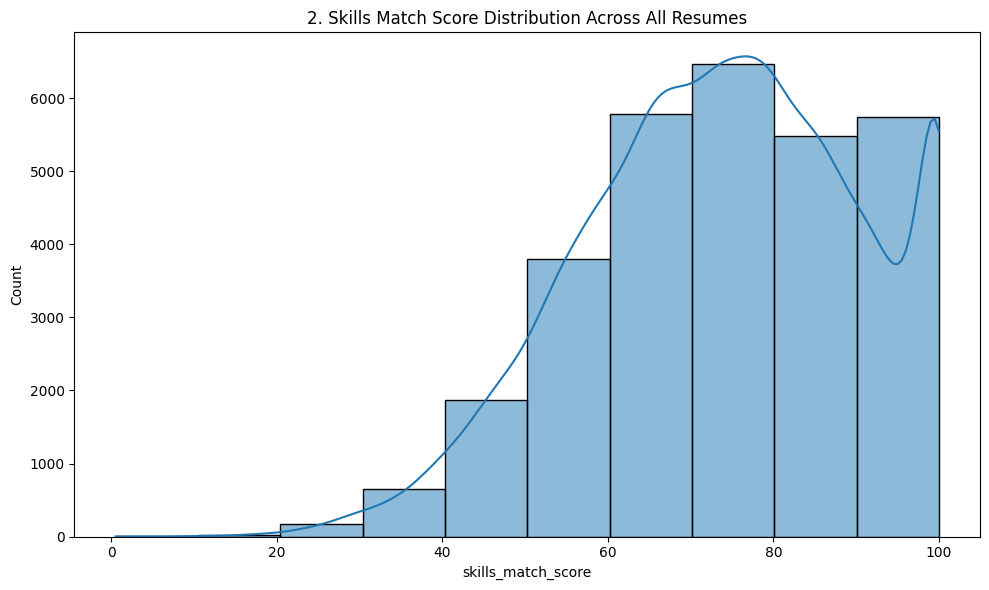

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['skills_match_score'], bins=10, kde=True)
plt.title(f'{plot_no}. Skills Match Score Distribution Across All Resumes')
show_fig()
plot_no += 1


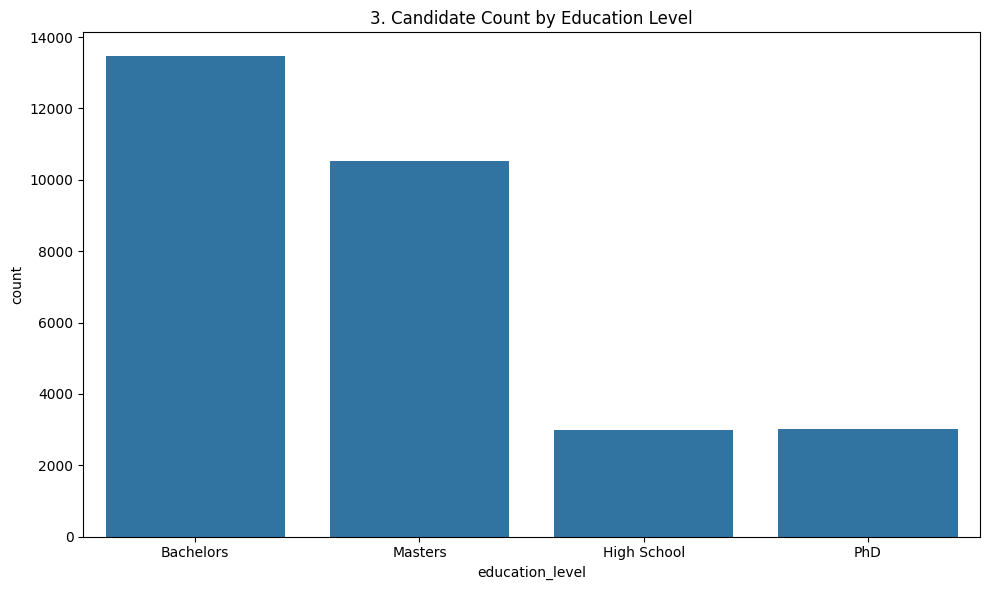

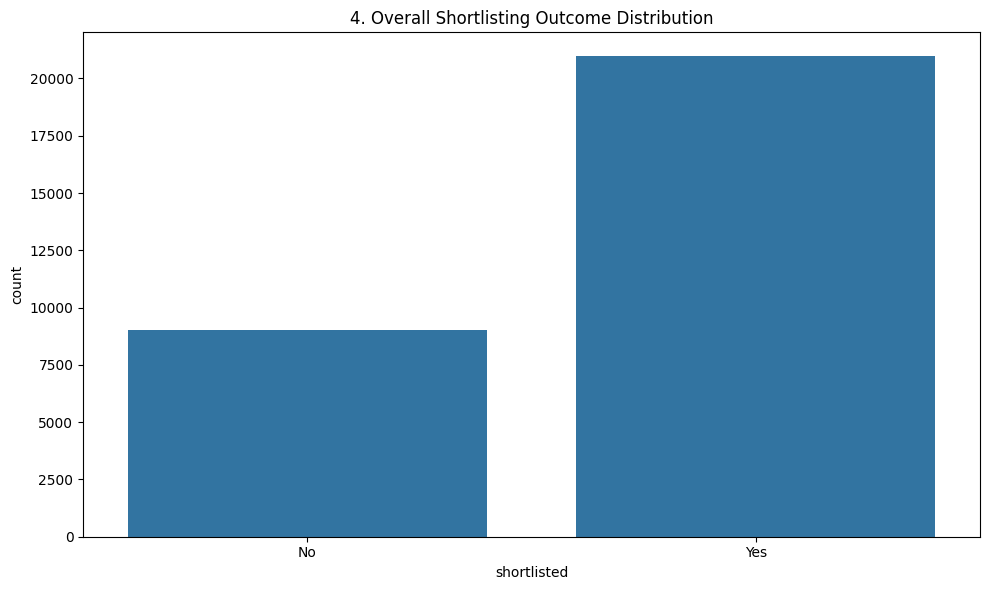

In [15]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='education_level', data=df)
plt.title(f'{plot_no}. Candidate Count by Education Level')
show_fig()
plot_no += 1
fig = plt.figure(figsize=(10,6))
sns.countplot(x='shortlisted', data=df)
plt.title(f'{plot_no}. Overall Shortlisting Outcome Distribution')
show_fig()
plot_no += 1


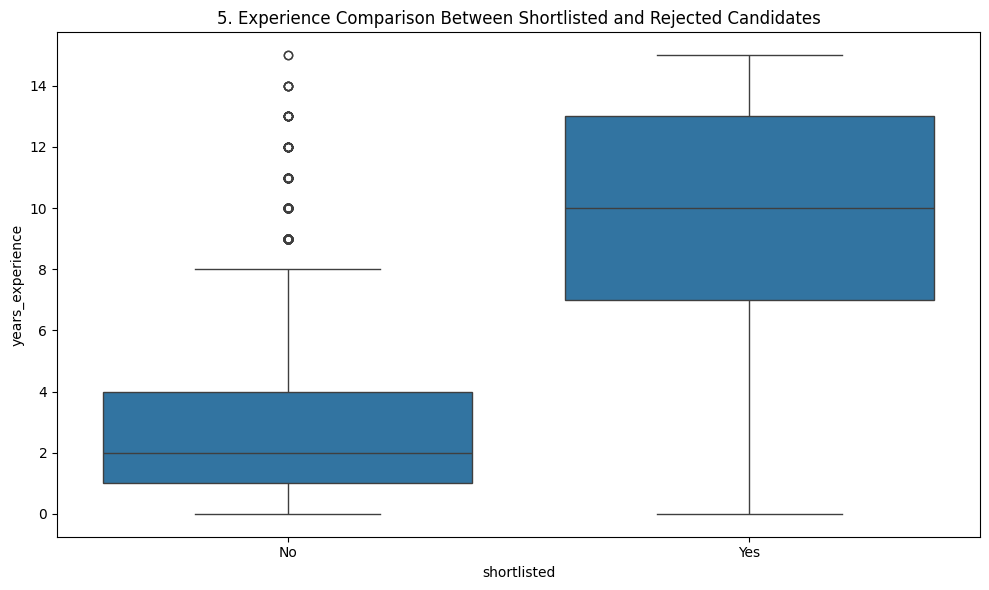

In [16]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='shortlisted', y='years_experience', data=df)
plt.title(f'{plot_no}. Experience Comparison Between Shortlisted and Rejected Candidates')
show_fig()
plot_no += 1


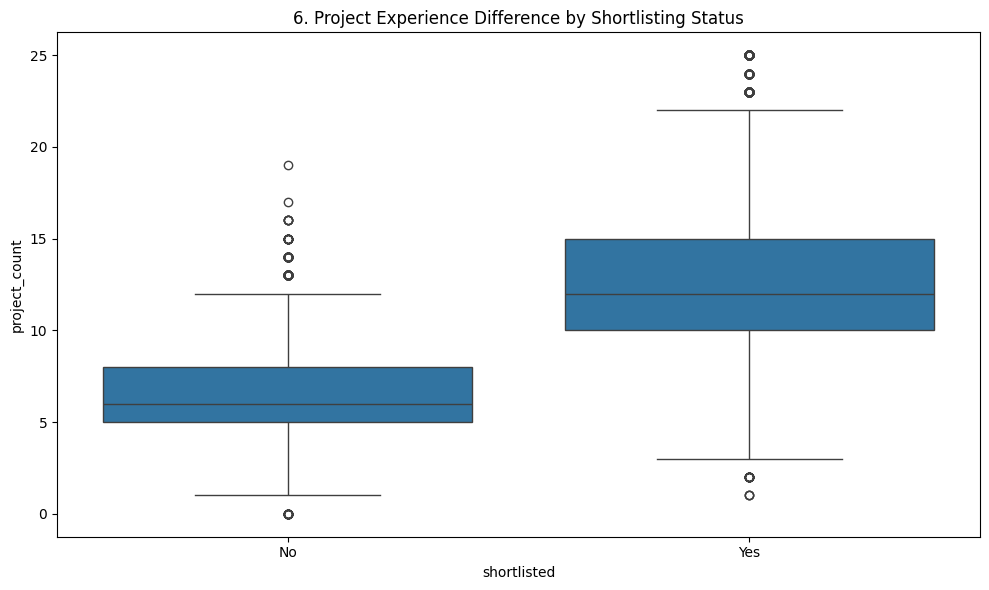

In [17]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='shortlisted', y='project_count', data=df)
plt.title(f'{plot_no}. Project Experience Difference by Shortlisting Status')
show_fig()
plot_no += 1


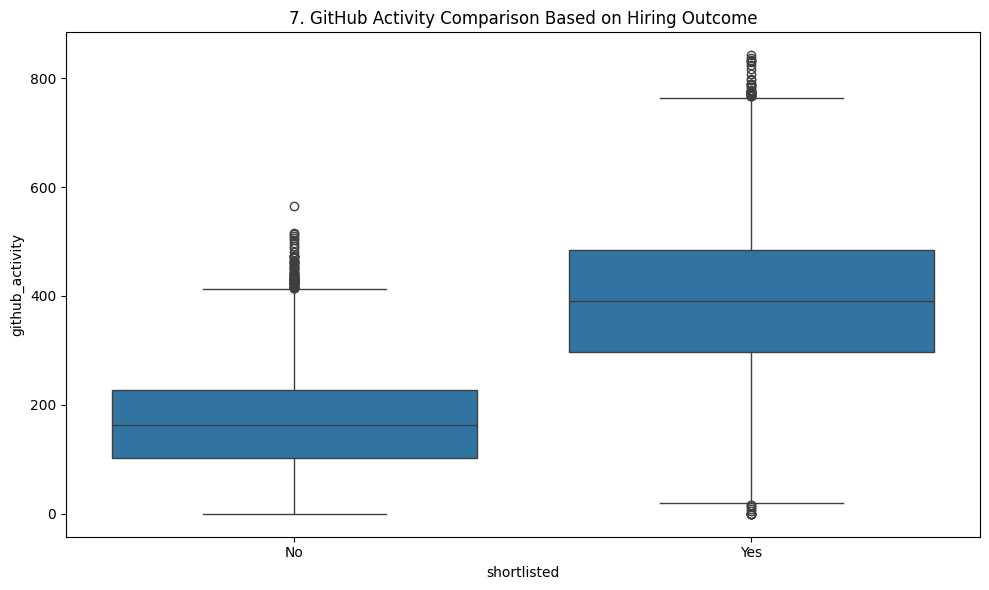

In [18]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='shortlisted', y='github_activity', data=df)
plt.title(f'{plot_no}. GitHub Activity Comparison Based on Hiring Outcome')
show_fig()
plot_no += 1


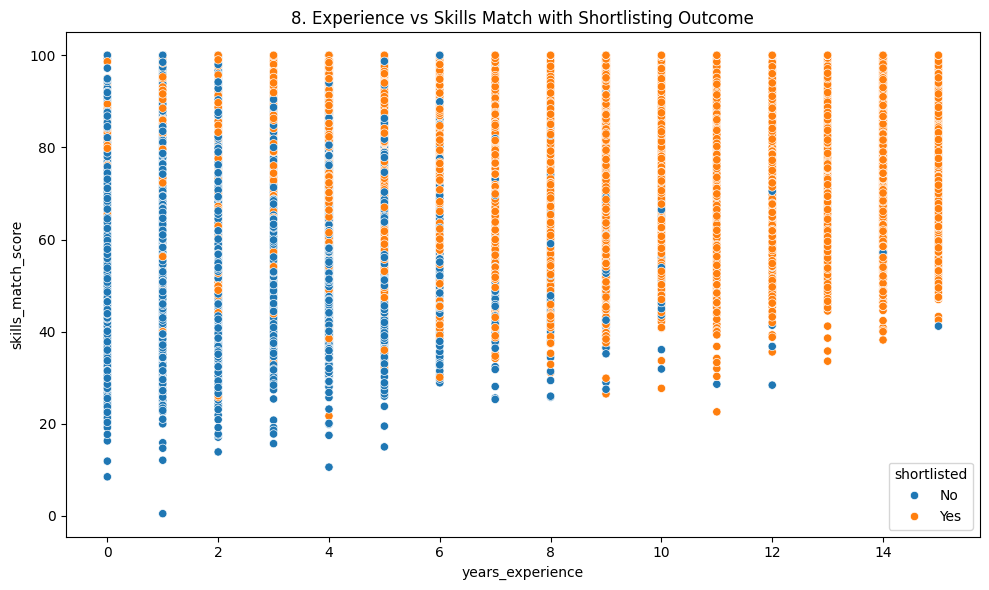

In [19]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='years_experience', y='skills_match_score', hue='shortlisted', data=df)
plt.title(f'{plot_no}. Experience vs Skills Match with Shortlisting Outcome')
show_fig()
plot_no += 1


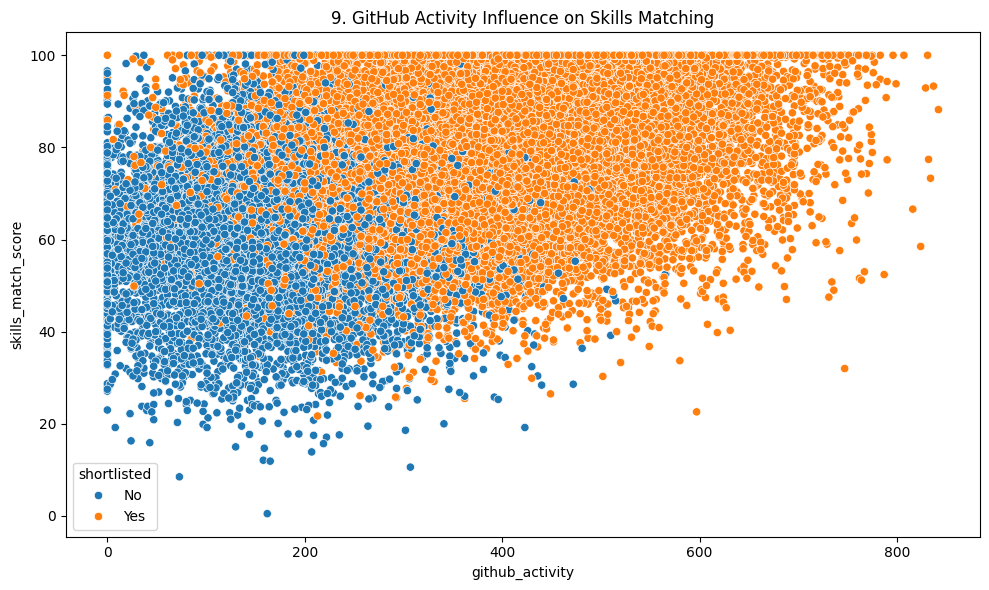

In [20]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='github_activity', y='skills_match_score', hue='shortlisted', data=df)
plt.title(f'{plot_no}. GitHub Activity Influence on Skills Matching')
show_fig()
plot_no += 1


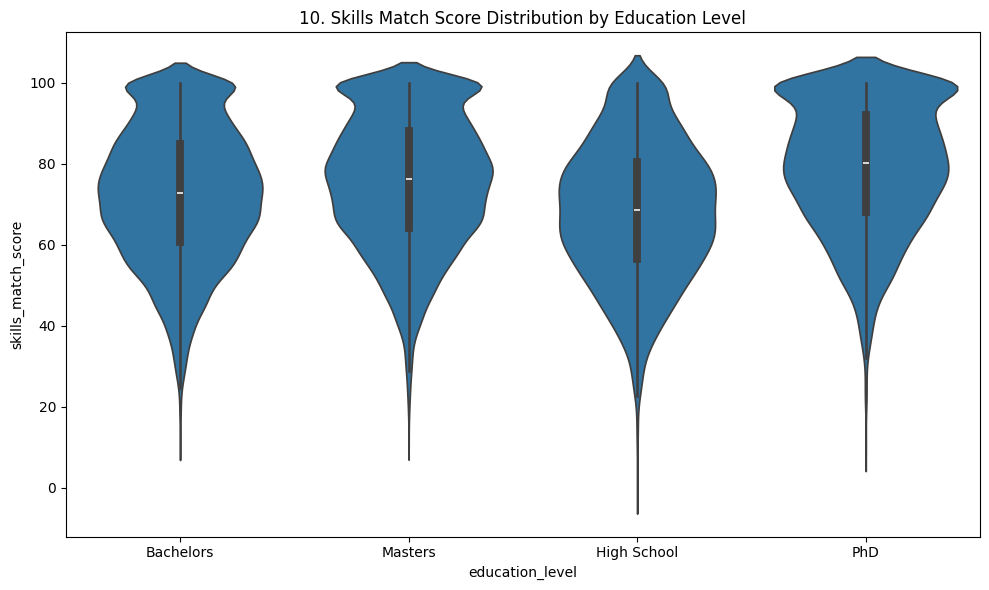

In [21]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(x='education_level', y='skills_match_score', data=df)
plt.title(f'{plot_no}. Skills Match Score Distribution by Education Level')
show_fig()
plot_no += 1


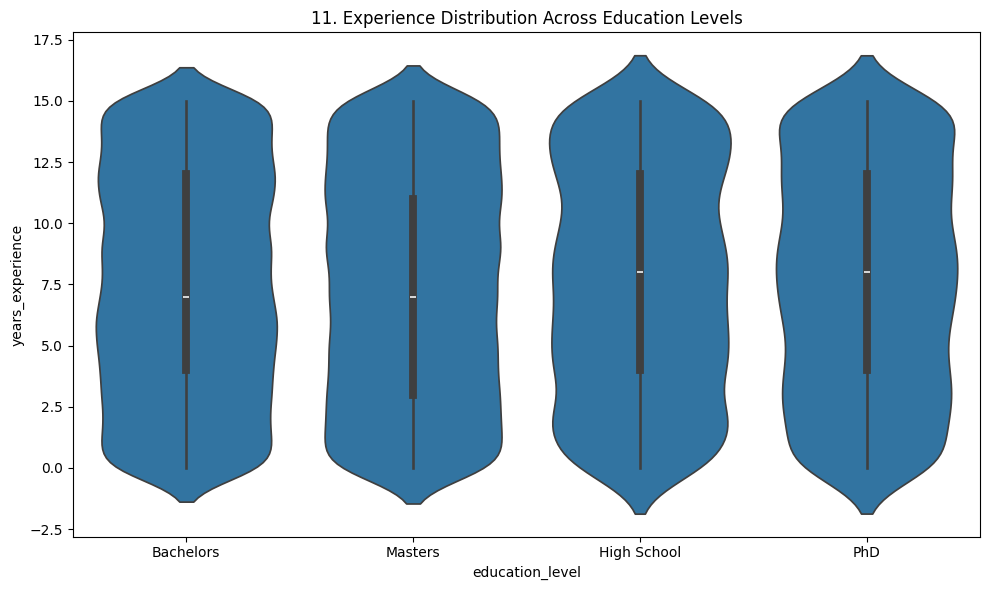

In [22]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(x='education_level', y='years_experience', data=df)
plt.title(f'{plot_no}. Experience Distribution Across Education Levels')
show_fig()
plot_no += 1


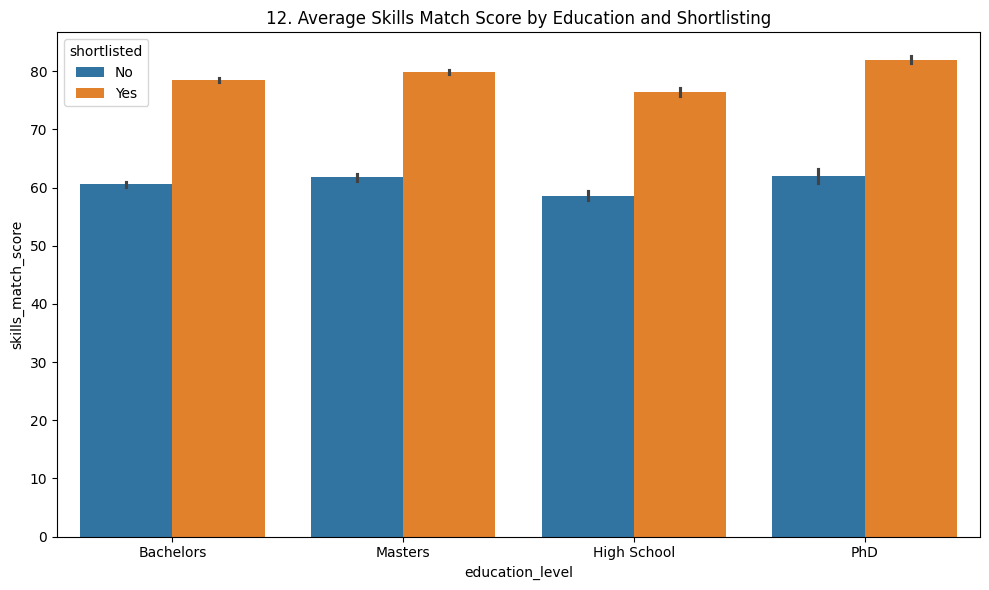

In [23]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='education_level', y='skills_match_score', hue='shortlisted', data=df)
plt.title(f'{plot_no}. Average Skills Match Score by Education and Shortlisting')
show_fig()
plot_no += 1


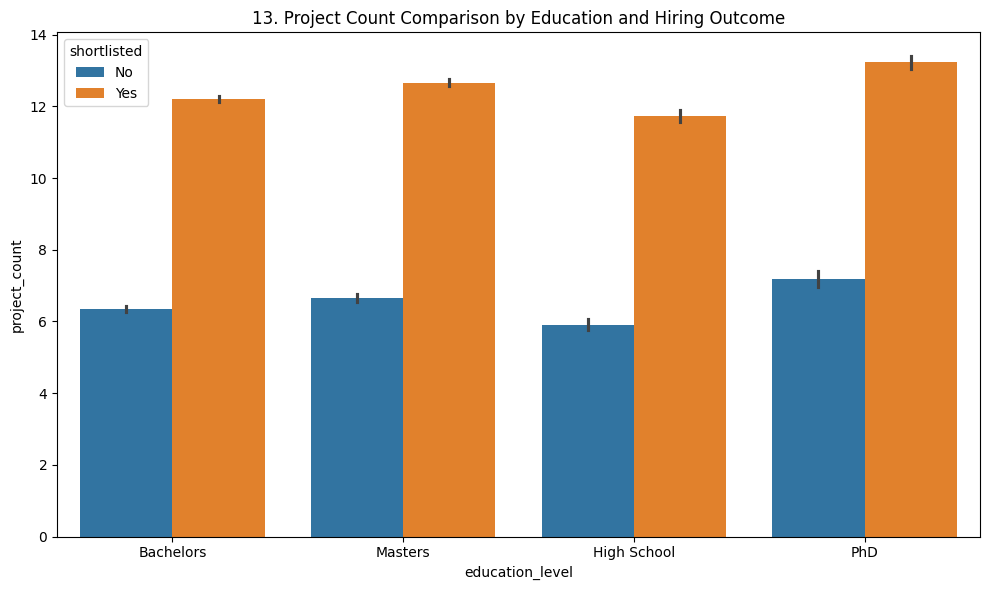

In [24]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='education_level', y='project_count', hue='shortlisted', data=df)
plt.title(f'{plot_no}. Project Count Comparison by Education and Hiring Outcome')
show_fig()
plot_no += 1


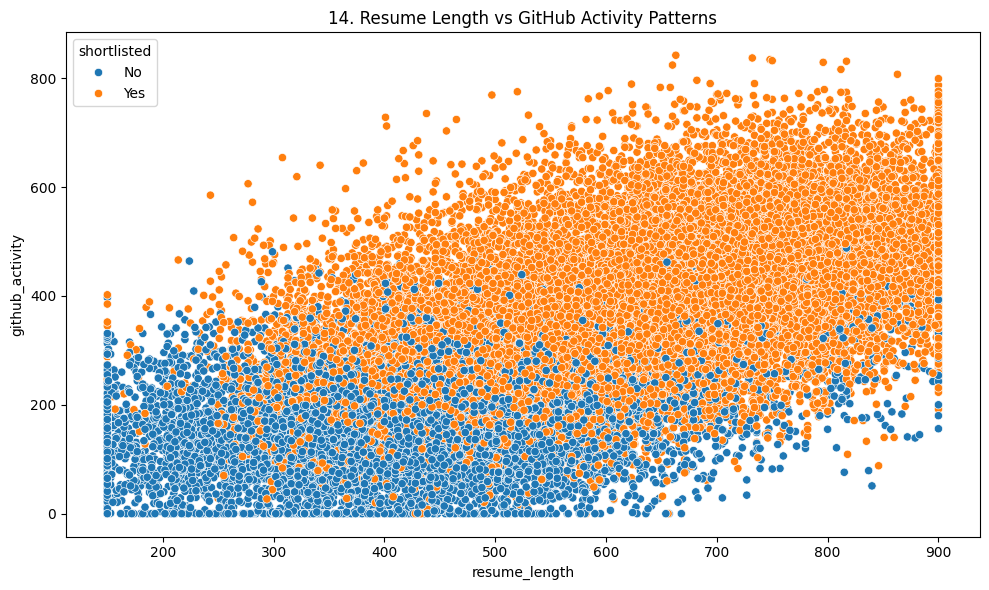

In [25]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='resume_length', y='github_activity', hue='shortlisted', data=df)
plt.title(f'{plot_no}. Resume Length vs GitHub Activity Patterns')
show_fig()
plot_no += 1


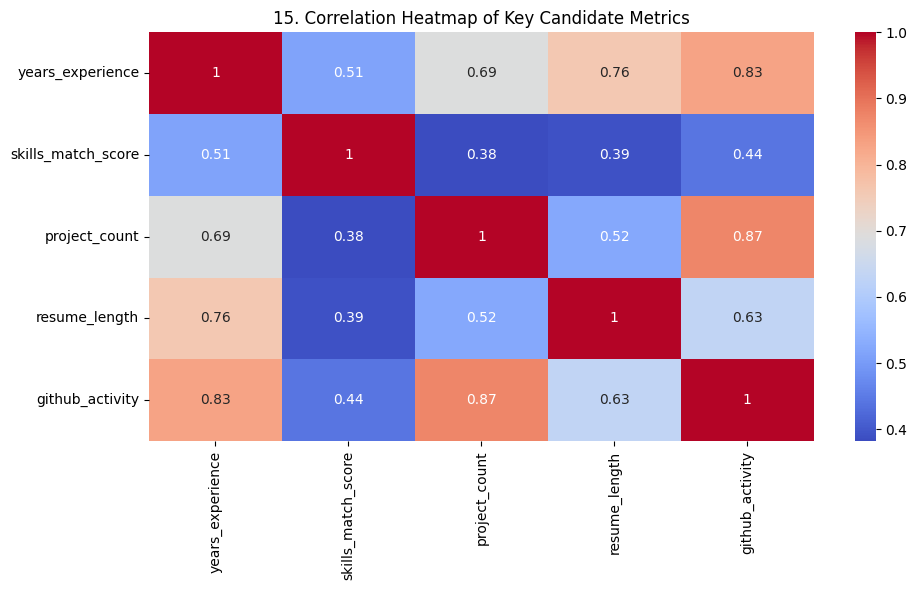

In [26]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df[['years_experience','skills_match_score','project_count','resume_length','github_activity']].corr(), annot=True, cmap='coolwarm')
plt.title(f'{plot_no}. Correlation Heatmap of Key Candidate Metrics')
show_fig()
plot_no += 1


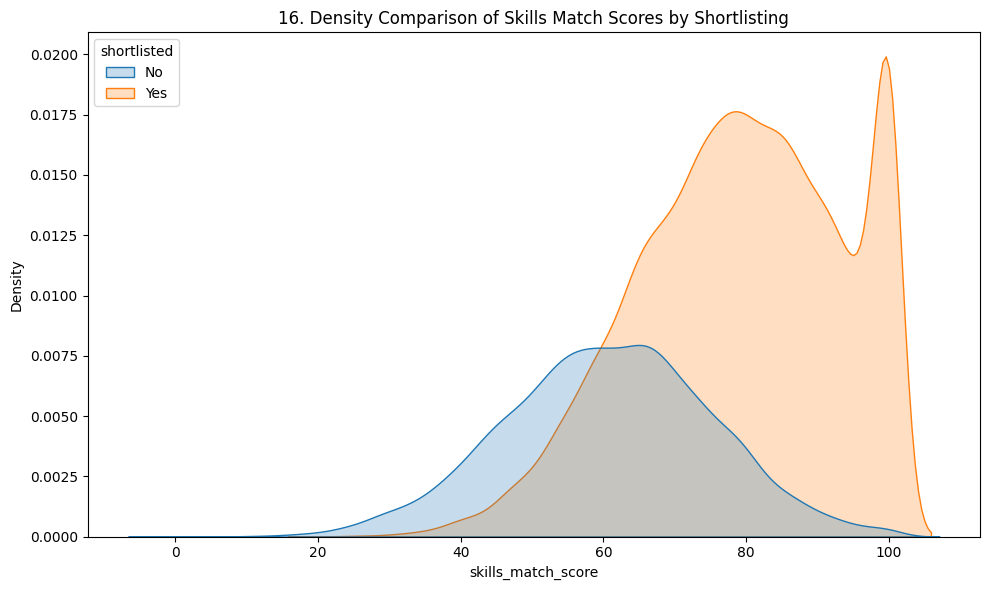

In [27]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='skills_match_score', hue='shortlisted', fill=True)
plt.title(f'{plot_no}. Density Comparison of Skills Match Scores by Shortlisting')
show_fig()
plot_no += 1


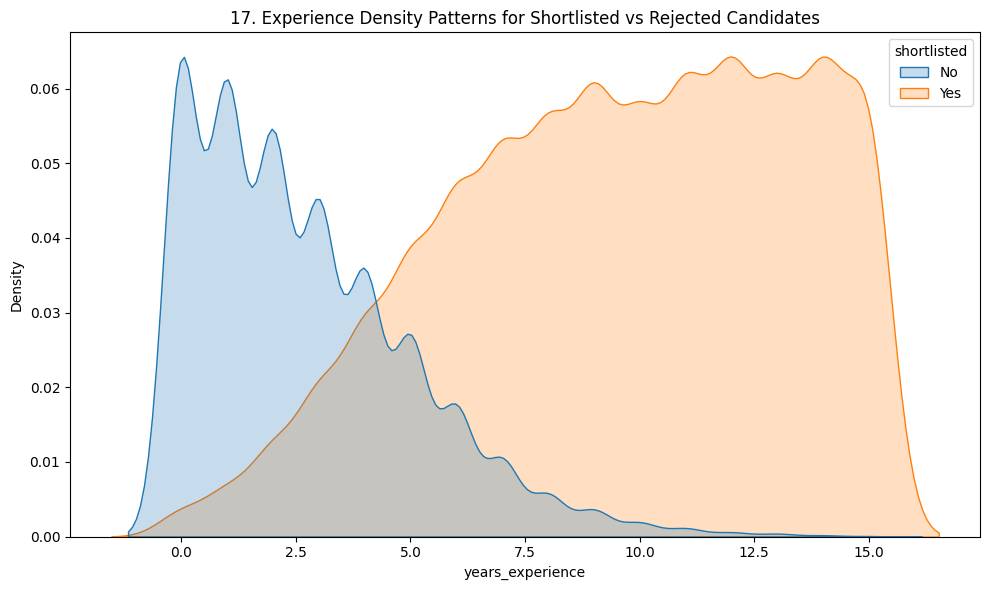

In [28]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='years_experience', hue='shortlisted', fill=True)
plt.title(f'{plot_no}. Experience Density Patterns for Shortlisted vs Rejected Candidates')
show_fig()
plot_no += 1


# Model Training

## Separate features and target

In [29]:
X = df[['years_experience','skills_match_score','project_count','resume_length','github_activity']]
y = df['shortlisted'].map({'No': 0, 'Yes': 1})

## Split data into training and testing sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Scale feature values for better model performance

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression supervised model

In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Predict on test data

In [33]:
y_pred = model.predict(X_test_scaled)

## Calculate and print accuracy score

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8968


## Visualize actual vs predicted using confusion matrix

<Figure size 1000x600 with 0 Axes>

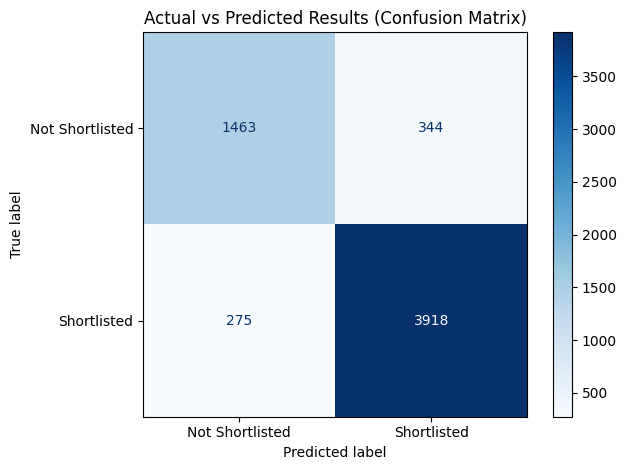

In [35]:
fig = plt.figure(figsize=(10,6))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=['Not Shortlisted','Shortlisted']
).plot(cmap='Blues')
plt.title('Actual vs Predicted Results (Confusion Matrix)')
plt.tight_layout()
plt.show()